<a href="https://colab.research.google.com/github/crimefightingllama/MITOS_WSI_CCMCT/blob/master/Copy_of_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot the region of interest selected by the algorithms and the pathologists

Requirements: 
- Subfolder MITOS_WSI_CCMCT with contents of https://github.com/maubreville/MITOS_WSI_CCMCT
----> run notebook Setup.ipynb to download all whole slide images of the data set
- SlideRunner (install e.g., via pip install SlideRunner)
-   +-- openslide
-   +-- opencv3

In [1]:
!git clone https://github.com/crimefightingllama/MitosisRegionOfInterest

Cloning into 'MitosisRegionOfInterest'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 185 (delta 9), reused 20 (delta 7), pack-reused 156
Receiving objects: 100% (185/185), 795.88 MiB | 38.58 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Updating files: 100% (115/115), done.


In [2]:
cd MitosisRegionOfInterest/

/content/MitosisRegionOfInterest


In [3]:
!git clone https://github.com/crimefightingllama/MITOS_WSI_CCMCT

Cloning into 'MITOS_WSI_CCMCT'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 324 (delta 8), reused 17 (delta 7), pack-reused 303
Receiving objects: 100% (324/324), 876.54 MiB | 21.11 MiB/s, done.
Resolving deltas: 100% (135/135), done.
Updating files: 100% (138/138), done.


In [ ]:
run /content/MitosisRegionOfInterest/MITOS_WSI_CCMCT/Copy_of_Setup.ipynb

In [6]:
!pip install SlideRunner
!pip install requests-toolbelt
!sudo apt update && apt install -y openslide-tools
!pip install openslide-python
!pip install EXCAT-Sync

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.7/338.7 KB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 KB 30.9 MB/s eta 0:00:00
  Created wheel for openslide-python: filename=openslide_python-1.2.0-cp39-cp39-linux_x86_64.whl size=27989 sha256=b53ef79809f856a563e191df8150046bca3d9ddd7531d19444d189fcbee95e89
  Stored in directory: /root/.cache/pip/wheels/ad/84/69/1b8062b5e72d19f9fc3586e1946ee99ea65403e3133ecad1f5
Successful

In [12]:
!git pull https://github.com/crimefightingllama/MitosisRegionOfInterest

From https://github.com/crimefightingllama/MitosisRegionOfInterest
 * branch            HEAD       -> FETCH_HEAD
Already up to date.


In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
import sqlite3
from SlideRunner.general.dependencies import *
import numpy as np
from SlideRunner.dataAccess import *
from SlideRunner.dataAccess import *
from SlideRunner.dataAccess import annotations
import SlideRunner.dataAccess.annotations
import os
import openslide
import sys
import pickle
os.chdir("..")
%cd content/MitosisRegionOfInterest
print(os.getcwd())
%cd lib/

# os.chdir("lib")
# from lib.retrieveDensity import *
# from lib.visualization import *
from retrieveDensity import *
from visualization import *


plt.rcParams['image.composite_image'] = False



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[Errno 2] No such file or directory: 'content/MitosisRegionOfInterest'
/content/MitosisRegionOfInterest/lib
/content/MitosisRegionOfInterest
/content/MitosisRegionOfInterest/lib


In [28]:
os.chdir("..")

In [29]:
pwd

'/content/MitosisRegionOfInterest'

We did a post-training selection on the validation set, and selected amongst the last 20 epochs the one with the smallest error (regression approach) or highest F1 score (unet segmentation approach)



In [30]:

epochs_selected_regression = [138, 146, 149]
epochs_selected_segmentation = [135, 143, 132]


## Definition of slides and cross-validation run sets

In [31]:
slidelist = [['be10fa37ad6e88e1f406.svs', 'f3741e764d39ccc4d114.svs', 'c86cd41f96331adf3856.svs', 
              '552c51bfb88fd3e65ffe.svs', '8c9f9618fcaca747b7c3.svs', 'c91a842257ed2add5134.svs', 
              'dd4246ab756f6479c841.svs', 'f26e9fcef24609b988be.svs', '96274538c93980aad8d6.svs', 
              'add0a9bbc53d1d9bac4c.svs', '1018715d369dd0df2fc0.svs'],
             ['c3eb4b8382b470dd63a9.svs', 'fff27b79894fe0157b08.svs', 'ac1168b2c893d2acad38.svs', 
              '8bebdd1f04140ed89426.svs', '39ecf7f94ed96824405d.svs', '2f2591b840e83a4b4358.svs', 
              '91a8e57ea1f9cb0aeb63.svs', '066c94c4c161224077a9.svs', '9374efe6ac06388cc877.svs', 
              '285f74bb6be025a676b6.svs', 'ce949341ba99845813ac.svs'],
             ['2f17d43b3f9e7dacf24c.svs', 'a0c8b612fe0655eab3ce.svs', '34eb28ce68c1106b2bac.svs', 
              '3f2e034c75840cb901e6.svs', '20c0753af38303691b27.svs', '2efb541724b5c017c503.svs', 
              'dd6dd0d54b81ebc59c77.svs', '2e611073cff18d503cea.svs', '70ed18cd5f806cf396f0.svs', 
              '0e56fd11a762be0983f0.svs']]

testslides = slidelist[0]+slidelist[1]+slidelist[2]

# the order will be actually determined later, however, it helped me to not confuse the slides to have it in 
# the (later determined) correct order right from the start
testslides=[testslides[x] for x in [ 0, 29, 28, 21, 20, 19, 18, 17, 16, 31,  2,  3,  1, 30,  4, 27, 14,  5, 12,  6, 13, 23, 15, 11, 7,  9, 22, 26, 24,  8, 25, 10]]




## File definition for the object-detection-based approaches

In [32]:
# Thresholds for the object detection approach  (have been optimized on the train+validation set)
thresholds_2ndstage = [0.54, 0.41, 0.40]
thresholds_1stage = [0.79, 0.81, 0.69]


files_1stage =  ['RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p', 
                'RetinaNet-ODAEL-export-batch2.pth-ODAEL_batch2-inference_results_boxes.p',
                'RetinaNet-ODAEL-export-batch3.pth-ODAEL_batch3-inference_results_boxes.p']
files_2ndstage = ['2ndstage_RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p', 
                '2ndstage_RetinaNet-ODAEL-export-batch2.pth-ODAEL_batch2-inference_results_boxes.p',
                '2ndstage_RetinaNet-ODAEL-export-batch3.pth-ODAEL_batch3-inference_results_boxes.p']

# Ablation study

thresholds_10hpf_2ndstage = [0.76,0.52,0.71]
thresholds_10hpf_1ststage = [0.65,0.60,0.52]

files_1stage_10hpf =  ['RetinaNet-ODAEL-10HPF-export.pth-CCMCT_ODAEL-inference_results_boxes.p', 
                       'RetinaNet-ODAEL-10HPF-batch2-export.pth-CCMCT_ODAEL-inference_results_boxes.p',
                       'RetinaNet-ODAEL-10HPF-batch3-export.pth-CCMCT_ODAEL-inference_results_boxes.p']
files_2stage_10hpf =  ['2ndstage_RetinaNet-ODAEL-10HPF-export.pth-CCMCT_ODAEL-inference_results_boxes.p', 
                       '2ndstage_RetinaNet-ODAEL-10HPF-batch2-export.pth-CCMCT_ODAEL-inference_results_boxes.p',
                       '2ndstage_RetinaNet-ODAEL-10HPF-batch3-export.pth-CCMCT_ODAEL-inference_results_boxes.p']



In [33]:
DB = Database().open('MITOS_WSI_CCMCT/databases/MITOS_WSI_CCMCT_ODAEL.sqlite')

dbExpert = Database()
dbTumorzone = Database()
dbTumorzone.open('MITOS_WSI_CCMCT/databases/MITOS_WSI_CCMCT_Tumorzone.sqlite')
dbExpert.open('data/pathologists_anon.sqlite')

allSlides = dbTumorzone.execute('SELECT filename FROM Slides').fetchall()
results_1stage = []
results_2stage = []
results_1stage_10hpf = []
results_2stage_10hpf = []

## Load Object Detection results

To not use up too much space on github, results have been compressed using bzip2.

In [34]:
import bz2

slidedir = './MITOS_WSI_CCMCT/WSI/'
resultsdir = 'results/'


print('Loading OD 10HPF results ..')
for x in range(3):
        print('... ', files_1stage_10hpf[x])
        results_1stage_10hpf.append(pickle.load(bz2.BZ2File(resultsdir+files_1stage_10hpf[x]+'.bz2','rb')))

print('Loading OD2 10HPF results ..')
for x in range(3):
        print('... ', files_2stage_10hpf[x])
        results_2stage_10hpf.append(pickle.load(bz2.BZ2File(resultsdir+files_2stage_10hpf[x]+'.bz2','rb')))

print('Loading OD results ..')
for x in range(3):
        print('... ', files_1stage[x])
        results_1stage.append(pickle.load(bz2.BZ2File(resultsdir+files_1stage[x]+'.bz2','rb')))

print('Loading 2nd stage OD results ..')
for x in range(3):
        results_2stage.append(pickle.load(bz2.BZ2File(resultsdir+files_2ndstage[x]+'.bz2','rb')))
        print('... ', files_2ndstage[x])




Loading OD 10HPF results ..
...  RetinaNet-ODAEL-10HPF-export.pth-CCMCT_ODAEL-inference_results_boxes.p
...  RetinaNet-ODAEL-10HPF-batch2-export.pth-CCMCT_ODAEL-inference_results_boxes.p
...  RetinaNet-ODAEL-10HPF-batch3-export.pth-CCMCT_ODAEL-inference_results_boxes.p
Loading OD2 10HPF results ..
...  2ndstage_RetinaNet-ODAEL-10HPF-export.pth-CCMCT_ODAEL-inference_results_boxes.p
...  2ndstage_RetinaNet-ODAEL-10HPF-batch2-export.pth-CCMCT_ODAEL-inference_results_boxes.p
...  2ndstage_RetinaNet-ODAEL-10HPF-batch3-export.pth-CCMCT_ODAEL-inference_results_boxes.p
Loading OD results ..
...  RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p
...  RetinaNet-ODAEL-export-batch2.pth-ODAEL_batch2-inference_results_boxes.p
...  RetinaNet-ODAEL-export-batch3.pth-ODAEL_batch3-inference_results_boxes.p
Loading 2nd stage OD results ..
...  2ndstage_RetinaNet-ODAEL-export.pth-CCMCT_ODAEL-inference_results_boxes.p
...  2ndstage_RetinaNet-ODAEL-export-batch2.pth-ODAEL_batch2-inference_re

### Prepare color maps

In [35]:
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap


cmap = pl.cm.Greens

my_cmap = cmap(np.arange(cmap.N))

my_cmap[:,-1] = np.linspace(0, 1, cmap.N)

my_cmap = ListedColormap(my_cmap)

cmap = pl.cm.winter

my_cmap2 = cmap(np.arange(cmap.N))

my_cmap2[:,-1] = np.linspace(0, 1, cmap.N)

my_cmap2 = ListedColormap(my_cmap2)

# Main calculation step and drawing of result maps

This step generates the ground truth and estimated mitotic count maps for plotting (Figure 5 in the manuscript)

In [36]:
bp=list()
bplabel=list()
percMalign=list()
expertRegionCount=list()
for slidenumber,slidename in enumerate(testslides):
    valrun=None
    for k in range(3):
        if (slidename in slidelist[k]):
            valrun=k
            print(f'Slide: {slidename}, part of validation run: ',valrun)
    if valrun is None:
            continue

    countVal = dict()
    slidebasename = slidename[0:-4]

    countMap,W_x,W_y, mitosisMap, circleMap,mitlist = getMitoticCountGT(DB, slidedir, slidename)

    allExperts = dbExpert.execute('SELECT uid,name FROM Persons').fetchall()
    
    countVal=dict()
    center=dict()
    for expert,name in allExperts:
            
            countVal[name], center[name], countMap = getExpertRegion(dbExpert, expert, slidename, countMap)


    sl = openslide.open_slide(slidedir+slidename)
    thumb = sl.get_thumbnail(size=[countMap.shape[1], countMap.shape[0]])
    thumb = np.asarray(thumb)

    validMask = retrieveValidMask(slidedir+slidename)
    activeCountMap = countMap[validMask>0] 
    

    resultMap_OD1,single_OD1 = retrieveDensity_OD(slidedir,slidename, thresholds_1stage[valrun], results_1stage[valrun])
    resultMap_OD2,single_OD2 = retrieveDensity_OD(slidedir, slidename, thresholds_2ndstage[valrun], results_2stage[valrun])
    resultMap_Res,nonSmoothed = retrieveDensity_reg(slidedir, slidename, resultsdir, '_results_dirreg_%d.npz' % epochs_selected_regression[valrun])
    resultMap_segmentation, nonSmoothed = retrieveDensityUNET(slidedir, slidename, resultsdir, '.unet_roi_epoch%d_UNET.npz' % epochs_selected_segmentation[valrun])

    resultMap_OD1_10HPF,single_OD1_10HPF = retrieveDensity_OD(slidedir, slidename, thresholds_10hpf_1ststage[valrun], results_1stage_10hpf[valrun])
    resultMap_OD2_10HPF,single_OD2_10HPF = retrieveDensity_OD(slidedir, slidename, thresholds_10hpf_2ndstage[valrun], results_2stage_10hpf[valrun])

    # Apply valid mask on all results
    resultMap_segmentation[validMask==0]=0
    resultMap_OD1[validMask==0]=0
    resultMap_OD2[validMask==0]=0
    resultMap_OD1_10HPF[validMask==0]=0
    resultMap_OD2_10HPF[validMask==0]=0
    resultMap_Res[cv2.resize(validMask,dsize=resultMap_Res.shape[::-1])==0]=0
    maxC_OD1 = np.unravel_index(np.argmax(resultMap_OD1, axis=None), resultMap_OD1.shape)
    countVal['AlgoOD1'] = round(countMap[maxC_OD1[0],maxC_OD1[1]])
    maxC_OD2 = np.unravel_index(np.argmax(resultMap_OD2, axis=None), resultMap_OD2.shape)
    countVal['AlgoOD2'] = round(countMap[maxC_OD2[0],maxC_OD2[1]])

    maxC_OD1_10HPF = np.unravel_index(np.argmax(resultMap_OD1_10HPF, axis=None), resultMap_OD1_10HPF.shape)
    countVal['AlgoOD1_10HPF'] = round(countMap[maxC_OD1_10HPF[0],maxC_OD1_10HPF[1]])
    maxC_OD2_10HPF = np.unravel_index(np.argmax(resultMap_OD2_10HPF, axis=None), resultMap_OD2_10HPF.shape)
    countVal['AlgoOD2_10HPF'] = round(countMap[maxC_OD2_10HPF[0],maxC_OD2_10HPF[1]])

    ds_resnet = 16
    maxC_Reg = np.unravel_index(np.argmax(resultMap_Res, axis=None), resultMap_Res.shape)
    maxC_Reg = [x*ds_resnet for x in maxC_Reg]
    countVal['AlgoReg'] = round(countMap[maxC_Reg[0],maxC_Reg[1]])
    print('ResMap shape: ',resultMap_Res.shape,'Real shape:',countMap.shape)
    ds_resnet = 1
    maxC_Map = np.unravel_index(np.argmax(resultMap_segmentation, axis=None), resultMap_segmentation.shape)
    maxC_Map = [x*ds_resnet for x in maxC_Map]
    print('resultMap_segmentation shape: ',resultMap_segmentation.shape,'Real shape:',countMap.shape)
    countVal['AlgoMap'] = round(countMap[maxC_Map[0],maxC_Map[1]])

    print('   -> Plotting')
    fig = plt.figure(figsize=(10,5))
    print('       (Main image)')
    plt.imshow(thumb)
    plt.axis('off')

    print('       (Countmap overlay)')
    plt.imshow(countMap, cmap=my_cmap)
    clb = plt.colorbar()
    clb.set_label(label='mitotic count (MC)',size=18)
    clb.ax.tick_params(labelsize=16) 
    plt.tight_layout()

    colors = {'BCVP1': 'r', 
              'BCVP2': 'r',
              'BCVP3': 'r',
              'BCVP5': 'r',
              'BCVP4': 'r',
              'VPIT1': 'b',
              'VPIT2': 'b',
              'VPIT3': 'b'}

    markers = {'BCVP1': '*', 
              'BCVP2': 's',
              'BCVP3': 'o',
              'BCVP5': 'P',
              'BCVP4': 'X',
              'VPIT1': 'd',
              'VPIT2': 'p',
              'VPIT3': '.'}

    labels = {'BCVP1': 'BCVP1', 
              'BCVP2': 'BCVP2',
              'BCVP3': 'BCVP3',
              'BCVP4': 'BCVP4',
              'BCVP5': 'BCVP5',
              'VPIT1': 'VPIT1',
              'VPIT2': 'VPIT2',
              'VPIT3': 'VPIT3'}

    linestyle = {'BCVP1': '-', 
              'BCVP2': '--',
              'BCVP3': '-.',
              'BCVP5': ':',
              'BCVP4': '-',
              'VPIT1': '--',
              'VPIT2': '-.',
              'VPIT3': ':'}



    for name in labels.keys():
            plt_rect_around(center[name], d=(W_x,W_y), linewidth=2, linestyle=linestyle[name], color=colors[name], label='%s, GTMC=%d' % (labels[name], countVal[name]))


    plt_rect_around((maxC_OD1[1],maxC_OD1[0]), d=(W_x,W_y), linewidth=2, linestyle=':', color='c', label='OD1, GTMC=%d' % countVal['AlgoOD1'])
    plt_rect_around((maxC_OD2[1],maxC_OD2[0]), d=(W_x,W_y), linewidth=2, linestyle='-', color='c', label='OD2, GTMC=%d' % countVal['AlgoOD2'])
    plt_rect_around((maxC_Reg[1],maxC_Reg[0]), d=(W_x,W_y), linewidth=2, linestyle='-.', color='c', label='Reg, GTMC=%d' % countVal['AlgoReg'])
    plt_rect_around((maxC_Map[1],maxC_Map[0]), d=(W_x,W_y), linewidth=2, linestyle='--', color='c', label='Map, GTMC=%d' % countVal['AlgoMap'])
    plt_rect_around((maxC_OD2_10HPF[1],maxC_OD2_10HPF[0]), d=(W_x,W_y), linewidth=2, linestyle='-', color='m', label='OD2-10HPF, GTMC=%d' % countVal['AlgoOD2_10HPF'])
    

    plt.legend(loc='upper right', bbox_to_anchor=(-0.05, 0.75))
    fig.subplots_adjust(left=0.35)

    print('       (saving)')
    #plt.savefig('resultMap_%s.pdf' % slidename)
    plt.close(fig)
    print('       (saved)')

    fig = plt.figure(figsize=(10,5))
    plt.imshow(thumb)
    plt.axis('off')
    for name in labels.keys():
                    plt_rect_around(center[name], d=(W_x,W_y), linewidth=2, linestyle=linestyle[name], color=colors[name], label='%s, GTMC=%d' % (labels[name], countVal[name]))
        
        
    plt_rect_around((maxC_OD1[1],maxC_OD1[0]), d=(W_x,W_y), linewidth=2, linestyle=':', color='c', label='OD1, GTMC=%d' % countVal['AlgoOD1'])
    plt_rect_around((maxC_OD2[1],maxC_OD2[0]), d=(W_x,W_y), linewidth=2, linestyle='-', color='c', label='OD2, GTMC=%d' % countVal['AlgoOD2'])
    plt_rect_around((maxC_Reg[1],maxC_Reg[0]), d=(W_x,W_y), linewidth=2, linestyle='-.', color='c', label='Reg, GTMC=%d' % countVal['AlgoReg'])
    plt_rect_around((maxC_Map[1],maxC_Map[0]), d=(W_x,W_y), linewidth=2, linestyle='--', color='c', label='Seg, GTMC=%d' % countVal['AlgoMap'])
    plt_rect_around((maxC_OD2_10HPF[1],maxC_OD2_10HPF[0]), d=(W_x,W_y), linewidth=2, linestyle='-', color='m', label='OD2-10HPF, GTMC=%d' % countVal['AlgoOD2_10HPF'])

    for (x,y) in mitlist:
        plt.plot(x,y,marker='.',  color=[0,1,0], markersize=3)
        
    plt.legend(loc='upper right', bbox_to_anchor=(-0.05, 0.75))
    plt.tight_layout()
    #plt.savefig('circleMap_%s.pdf' % slidename)
    plt.title(f'Single slide results: {slidename}')
            
    expertRegionCount.append(countVal)

    percMalign += [100*np.sum(activeCountMap>=7)/activeCountMap.shape[0]]

    if (slidenumber in [1,6,10,11,12,13]):
        fig = plt.figure(figsize=(10,5))
        plt.imshow(thumb)
        plt.axis('off')
        for (x,y) in single_OD2:
                plt.plot(x,y,marker='.',  color=[0,1,0], markersize=3)

        clb.ax.tick_params(labelsize=16) 
        plt.tight_layout()
        plt_rect_around((maxC_OD2[1],maxC_OD2[0]), d=(W_x,W_y), linewidth=2, linestyle='-', color='c', label='OD2, GTMC=%d' % countVal['AlgoOD2'])
        plt.savefig('estimate_OD2%s.pdf' % slidename[:-4])
        plt.close(fig)

        fig = plt.figure(figsize=(10,5))
        plt.imshow(thumb)
        plt.axis('off')

        for (x,y) in single_OD2_10HPF:
                plt.plot(x,y,marker='.',  color=[0,1,0], markersize=3)
        plt_rect_around((maxC_OD2_10HPF[1],maxC_OD2_10HPF[0]), d=(W_x,W_y), linewidth=2, linestyle='-', color='m', label='OD2-10HPF, GTMC=%d' % countVal['AlgoOD2_10HPF'])

        plt.tight_layout()
       # plt.savefig('estimate_OD2_10HPF%s.pdf' % slidename[:-4])
        plt.close(fig)

    print('Adding activeCountMap to array',activeCountMap.shape)
    bp += [activeCountMap]
    print('Done.')



Slide: be10fa37ad6e88e1f406.svs, part of validation run:  0


AttributeError: ignored

# To the main results comparison plot (Figure 4 in the manuscript)


/localhome/aubrevillelocal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
/localhome/aubrevillelocal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
/localhome/aubrevillelocal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:111: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.


ID  0 : be10fa37ad6e88e1f406.svs
    BCVP1:0,BCVP2:2,VPIT1:1,BCVP3:1,BCVP4:1,VPIT2:0,BCVP5:2,VPIT3:0,AlgoOD1:2,AlgoOD2:1,AlgoOD1_10HPF:2,AlgoOD2_10HPF:0,AlgoReg:2,AlgoMap:2
ID  1 : 2e611073cff18d503cea.svs
    BCVP1:1,BCVP2:0,VPIT1:1,BCVP3:0,BCVP4:0,VPIT2:0,BCVP5:0,VPIT3:0,AlgoOD1:1,AlgoOD2:5,AlgoOD1_10HPF:1,AlgoOD2_10HPF:1,AlgoReg:5,AlgoMap:0
ID  2 : dd6dd0d54b81ebc59c77.svs
    BCVP1:0,BCVP2:1,VPIT1:0,BCVP3:0,BCVP4:0,VPIT2:0,BCVP5:1,VPIT3:0,AlgoOD1:1,AlgoOD2:2,AlgoOD1_10HPF:1,AlgoOD2_10HPF:1,AlgoReg:1,AlgoMap:2
ID  3 : ce949341ba99845813ac.svs
    BCVP1:0,BCVP2:0,VPIT1:0,BCVP3:0,BCVP4:0,VPIT2:0,BCVP5:0,VPIT3:0,AlgoOD1:0,AlgoOD2:1,AlgoOD1_10HPF:0,AlgoOD2_10HPF:0,AlgoReg:0,AlgoMap:0
ID  4 : 285f74bb6be025a676b6.svs
    BCVP1:0,BCVP2:0,VPIT1:0,BCVP3:0,BCVP4:1,VPIT2:0,BCVP5:2,VPIT3:0,AlgoOD1:2,AlgoOD2:2,AlgoOD1_10HPF:1,AlgoOD2_10HPF:2,AlgoReg:1,AlgoMap:2
ID  5 : 9374efe6ac06388cc877.svs
    BCVP1:1,BCVP2:0,VPIT1:0,BCVP3:0,BCVP4:1,VPIT2:0,BCVP5:0,VPIT3:0,AlgoOD1:2,AlgoOD2:1,AlgoOD1_10HPF:

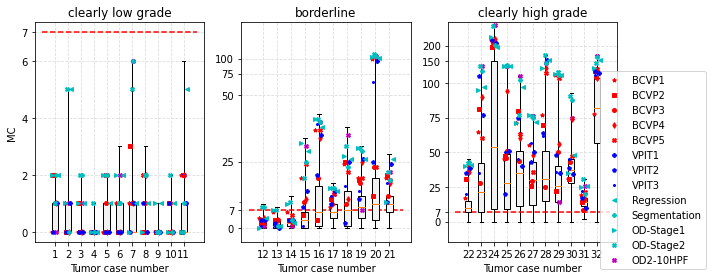

In [ ]:
# First sort into the 3 box plots
argsorted = np.argsort(percMalign)
percMalignSorted=list()
expertRegionCountSorted=list()
bpSorted=list()
for k in range(argsorted.shape[0]):
    sortIdx = argsorted[k]
    percMalignSorted.append(percMalign[sortIdx])
    bpSorted.append(bp[sortIdx])
    expertRegionCountSorted.append(expertRegionCount[sortIdx])

bp1=list()
bp1label=list()
bp2=list()
bp2label=list()
bp3=list()
bp3label=list()
OFFSET1=11
OFFSET2=21
for k in np.arange(0,OFFSET1):
    bp1 += [bpSorted[k]]
    bp1label += [k+1]

for k in np.arange(OFFSET1,OFFSET2):
    bp2 += [bpSorted[k]]
    bp2label += [k+1]

for k in np.arange(OFFSET2,32):
    bp3 += [bpSorted[k]]
    bp3label += [k+1]

import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 4


fig = plt.figure(figsize=(10,4))
sb1 = plt.subplot(1,3,1)
plt.plot(np.arange(len(bp1)+2), np.ones(len(bp1)+2)*7, 'r--')
bplot = plt.boxplot(bp1,labels=bp1label, whis='range', patch_artist=True)
for patch in bplot['boxes']:
        patch.set_facecolor('#F2F2F2')

plt.xlabel('Tumor case number')
plt.title('clearly low grade')
plt.ylabel('MC')
plt.grid(linestyle='--', color='#DDDDDD')
plt.yticks([0,2,4,6,7,8,10,12])
for k in np.arange(0,OFFSET1):
    leg1 = plt.plot(k+0.75,expertRegionCountSorted[k]['BCVP1'], color='r', marker='*', zorder=10)[0]
    leg2 = plt.plot(k+0.85,expertRegionCountSorted[k]['BCVP2'], color='r', marker='s', zorder=10)[0]
    leg3 = plt.plot(k+0.95,expertRegionCountSorted[k]['BCVP4'], color='r', marker='o', zorder=10)[0]
    leg4 = plt.plot(k+1.05,expertRegionCountSorted[k]['BCVP3'], color='r', marker='d', zorder=10)[0]
    leg5 = plt.plot(k+0.85,expertRegionCountSorted[k]['BCVP5'], color='r', marker='X', zorder=10)[0]
    leg6 = plt.plot(k+1.15,expertRegionCountSorted[k]['VPIT1'], color='b', marker='P', zorder=10)[0]
    leg7 = plt.plot(k+0.85,expertRegionCountSorted[k]['VPIT2'], color='b', marker='p', zorder=10)[0]
    leg8 = plt.plot(k+0.85,expertRegionCountSorted[k]['VPIT3'], color='b', marker=',', zorder=10)[0]
    legA = plt.plot(k+1.25,expertRegionCountSorted[k]['AlgoReg'], color='c', marker='<', zorder=10)[0]
    legD = plt.plot(k+1.05,expertRegionCountSorted[k]['AlgoMap'], color='c', marker='P', zorder=10)[0]
    legB = plt.plot(k+0.75,expertRegionCountSorted[k]['AlgoOD1'], color='c', marker='>', zorder=10)[0]
    legC = plt.plot(k+0.95,expertRegionCountSorted[k]['AlgoOD2'], color='c', marker='X', zorder=10)[0]
    legF = plt.plot(k+1.05,expertRegionCountSorted[k]['AlgoOD2_10HPF'], linewidth=0, color='m', marker='X', zorder=5)[0]

plt.subplots_adjust(left=0.05,right=0.85)

sb2 = plt.subplot(1,3,2)
plt.plot(np.arange(len(bp2)+2), np.ones(len(bp2)+2)*7, 'r--')
bplot = plt.boxplot(bp2,labels=bp2label, whis='range',patch_artist=True)
for patch in bplot['boxes']:
        patch.set_facecolor('#F2F2F2')
plt.xlabel('Tumor case number')
plt.title('borderline')
plt.yticks([0,7,25,50,75,100,125,150,175,200])
plt.ylim([-5,200])

plt.grid(linestyle='--', color='#DDDDDD')
for k in np.arange(OFFSET1,OFFSET2):
    leg1 = plt.plot(k+0.75-OFFSET1,expertRegionCountSorted[k]['BCVP1'], color='r', marker='*', zorder=10)
    leg2 = plt.plot(k+0.85-OFFSET1,expertRegionCountSorted[k]['BCVP2'], color='r', marker='s', zorder=10)
    leg3 = plt.plot(k+0.95-OFFSET1,expertRegionCountSorted[k]['BCVP4'], color='r', marker='o', zorder=10)
    leg4 = plt.plot(k+1.05-OFFSET1,expertRegionCountSorted[k]['BCVP3'], color='r', marker='d', zorder=10)
    leg5 = plt.plot(k+1.05-OFFSET1,expertRegionCountSorted[k]['BCVP5'], color='r', marker='X', zorder=10)
    leg6 = plt.plot(k+1.15-OFFSET1,expertRegionCountSorted[k]['VPIT1'], color='b', marker='P', zorder=10)
    leg7 = plt.plot(k+0.85-OFFSET1,expertRegionCountSorted[k]['VPIT2'], color='b', marker='p', zorder=10)
    leg8 = plt.plot(k+0.85-OFFSET1,expertRegionCountSorted[k]['VPIT3'], color='b', marker='.', zorder=10)
    legA = plt.plot(k+1.25-OFFSET1,expertRegionCountSorted[k]['AlgoReg'], color='c', marker='<', zorder=10)
    legD = plt.plot(k+1.05-OFFSET1,expertRegionCountSorted[k]['AlgoMap'], color='c', marker='P', zorder=10)[0]
    legB = plt.plot(k+0.75-OFFSET1,expertRegionCountSorted[k]['AlgoOD1'], color='c', marker='>', zorder=10)
    legC = plt.plot(k+0.95-OFFSET1,expertRegionCountSorted[k]['AlgoOD2'], color='c', marker='X', zorder=10)[0]
    legF = plt.plot(k+1.05-OFFSET1,expertRegionCountSorted[k]['AlgoOD2_10HPF'], linewidth=0, color='m', marker='X', zorder=5)[0]

plt.yscale('symlog',linthreshy= 50)
plt.yticks([0,7,25,50,75, 100], ['0','7','25','50','75', '100'])

sb3 = plt.subplot(1,3,3)

for k in np.arange(OFFSET2,32):
    leg1 = fig.gca().plot(k+0.75-OFFSET2,expertRegionCountSorted[k]['BCVP1'], linewidth=0, color='r', marker='*', zorder=10)[0]
    leg2 = fig.gca().plot(k+0.85-OFFSET2,expertRegionCountSorted[k]['BCVP2'], linewidth=0, color='r', marker='s', zorder=10)[0]
    leg3 = fig.gca().plot(k+0.95-OFFSET2,expertRegionCountSorted[k]['BCVP4'], linewidth=0, color='r', marker='o', zorder=10)[0]
    leg4 = fig.gca().plot(k+1.05-OFFSET2,expertRegionCountSorted[k]['BCVP3'], linewidth=0, color='r', marker='d', zorder=10)[0]
    leg5 = fig.gca().plot(k+1.05-OFFSET2,expertRegionCountSorted[k]['BCVP5'], linewidth=0, color='r', marker='X', zorder=10)[0]
    leg6 = fig.gca().plot(k+1.15-OFFSET2,expertRegionCountSorted[k]['VPIT1'], linewidth=0, color='b', marker='P', zorder=10)[0]
    leg7 = fig.gca().plot(k+0.85-OFFSET2,expertRegionCountSorted[k]['VPIT2'], linewidth=0, color='b', marker='p', zorder=10)[0]
    leg8 = fig.gca().plot(k+0.85-OFFSET2,expertRegionCountSorted[k]['VPIT3'], linewidth=0, color='b', marker='.', zorder=10)[0]
    legA = fig.gca().plot(k+1.25-OFFSET2,expertRegionCountSorted[k]['AlgoReg'], linewidth=0, color='c', marker='<', zorder=10)[0]
    legD = fig.gca().plot(k+1.05-OFFSET2,expertRegionCountSorted[k]['AlgoMap'], linewidth=0, color='c', marker='P', zorder=10)[0]
    legB = fig.gca().plot(k+0.75-OFFSET2,expertRegionCountSorted[k]['AlgoOD1'], linewidth=0, color='c', marker='>', zorder=10)[0]
    legC = fig.gca().plot(k+0.95-OFFSET2,expertRegionCountSorted[k]['AlgoOD2'], linewidth=0, color='c', marker='X', zorder=10)[0]
    legF = fig.gca().plot(k+1.05-OFFSET2,expertRegionCountSorted[k]['AlgoOD2_10HPF'], linewidth=0, color='m', marker='X', zorder=5)[0]

bplot = plt.boxplot(bp3,labels=bp3label, whis='range', patch_artist=True)
for patch in bplot['boxes']:
        patch.set_facecolor('#F2F2F2')

plt.plot(np.arange(len(bp3)+2), np.ones(len(bp3)+2)*7, 'r--')
plt.yticks([0,7,25,50,75,100,150,200,250,300])
plt.ylim()
plt.xlabel('Tumor case number')
plt.title('clearly high grade')
plt.grid(linestyle='--', color='#DDDDDD')


plt.legend((leg1,leg2, leg3, leg4, leg5,leg6,leg7, leg8, legA,legD, legB, legC, legF),('BCVP1','BCVP2','BCVP3','BCVP4','BCVP5', 'VPIT1','VPIT2', 'VPIT3','Regression','Segmentation','OD-Stage1', 'OD-Stage2','OD2-10HPF'),
   loc='upper right', bbox_to_anchor=(1.55, 0.8))
plt.yscale('symlog',linthreshy= 100)
plt.yticks([0,7,25,50,75, 100,150,200], ['0','7','25','50','75', '100','150', '200'])

plt.tight_layout()
plt.savefig('Region_results.pdf')


for k in range(len(testslides)):
        print('ID ',k,':',testslides[argsorted[k]])
        print('   ',','.join(['%s:%d' % (exp, expertRegionCountSorted[k][exp]) for exp in expertRegionCountSorted[k].keys()]))



## Some Statistical analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                       sum_sq     df        F  PR(>F)
C(TumorCase)      497050.8594   31.0  71.4650  0.0000
C(IsExpertGroup)      30.4594    1.0   0.1358  0.7129
Residual           50032.2906  223.0      NaN     NaN


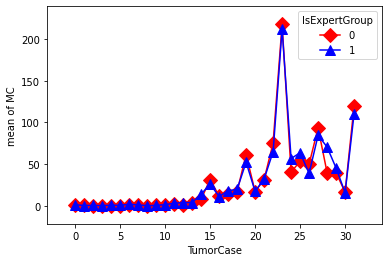

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats


#group1: Non-Experts
group1_box = [[expertRegionCountSorted[x]['VPIT1'], expertRegionCountSorted[x]['VPIT2'], expertRegionCountSorted[x]['VPIT3']] for x in range(len(expertRegionCountSorted))]
#Group2: Experts
group2_box = [[expertRegionCountSorted[x]['BCVP1'], expertRegionCountSorted[x]['BCVP2'], expertRegionCountSorted[x]['BCVP3'], expertRegionCountSorted[x]['BCVP4'], expertRegionCountSorted[x]['BCVP5']] for x in range(len(expertRegionCountSorted))]

idx_group1 = [[[x]*3] for x in range(len(expertRegionCountSorted))]
idx_group2 = [[[x]*5] for x in range(len(expertRegionCountSorted))]


# dependent variables
group1 = np.array(group1_box).flatten().tolist()
group2 = np.array(group2_box).flatten().tolist()
outputs = group1+group2

# independent variables
idx1 = np.array(idx_group1).flatten().tolist()
idx2 = np.array(idx_group2).flatten().tolist()
idxs = idx1+idx2

groups = ([0]*len(group1))+([1]*len(group2))
import pandas as pd

#data = pd.DataFrame(data=list(zip(outputs,idxs,groups)), columns=['MC','TumorCase','IsExpertGroup'])

raters = [1,2,3]*32 + [4,5,6,7,8]*32
data = pd.DataFrame(data=list(zip(outputs,idxs,groups,raters)), columns=['MC','TumorCase','IsExpertGroup','Rater'])

fig = interaction_plot(data.TumorCase, data.IsExpertGroup, data.MC,
             colors=['red','blue'], markers=['D','^'], ms=10)

plt.savefig('interaction.pdf')

formula = 'MC ~ C(TumorCase) + C(IsExpertGroup) '
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table.round(4))



In [ ]:
dataSG1 = data[(data.TumorCase<11) ]
dataSG2 = data[(data.TumorCase>=11) & (data.TumorCase<21)]
dataSG3 = data[(data.TumorCase>=21)]

combined = pd.DataFrame([(dataSG2.MC[(dataSG2.Rater==k+1)]>=7).to_numpy() for k in range(3)])
grading = np.array([np.sum(np.uint(combined.to_numpy())==0,0), np.sum(np.uint(combined.to_numpy())==1,0)])
from statsmodels.stats.inter_rater import fleiss_kappa
print('Fleiss kappa MC above threshold, VPIT: ',fleiss_kappa(grading.T))
combined = pd.DataFrame([(dataSG2.MC[(dataSG2.Rater==k+1)]>=7).to_numpy() for k in np.arange(3,8)])
grading = np.array([np.sum(np.uint(combined.to_numpy())==0,0), np.sum(np.uint(combined.to_numpy())==1,0)])
from statsmodels.stats.inter_rater import fleiss_kappa
print('Fleiss kappa,MC above threshold, BVCP: ',fleiss_kappa(grading.T))



Fleiss kappa MC above threshold, VPIT:  0.7129186602870812
Fleiss kappa,MC above threshold, BVCP:  0.8217468805704098


In [ ]:
data

,MC,TumorCase,IsExpertGroup,Rater
0,1.0,0,0,1
1,-0.0,0,0,2
2,-0.0,0,0,3
3,1.0,1,0,1
4,-0.0,1,0,2
...,...,...,...,...
251,78.0,31,1,4
252,124.0,31,1,5
253,110.0,31,1,6
254,112.0,31,1,7


In [ ]:
upperquartiles = np.array([np.percentile(case,75) for case in bpSorted])
medium = np.array([np.percentile(case,50) for case in bpSorted])


In [ ]:
data = pd.DataFrame(data=list(zip(outputs,idxs,groups,raters,upperquartiles[data.TumorCase], medium[data.TumorCase])), columns=['MC','TumorCase','IsExpertGroup','Rater', '75pct quartile', 'medium'])


In [ ]:
algos = [[expertRegionCountSorted[x]['AlgoMap'], expertRegionCountSorted[x]['AlgoReg'], expertRegionCountSorted[x]['AlgoOD2']] for x in range(len(expertRegionCountSorted))]

raters = [1,2,3]*32
idxs = np.array([[[x]*3] for x in range(len(expertRegionCountSorted))]).flatten().tolist()

outputs = np.array(algos).flatten().tolist()

dataAlgos = pd.DataFrame(data=list(zip(outputs,idxs,raters)), columns=['MC','TumorCase','Rater'])
dataAlgos = pd.DataFrame(data=list(zip(outputs,idxs,groups,raters,upperquartiles[dataAlgos.TumorCase], medium[dataAlgos.TumorCase])), columns=['MC','TumorCase','IsExpertGroup','Rater', '75pct quartile', 'medium'])


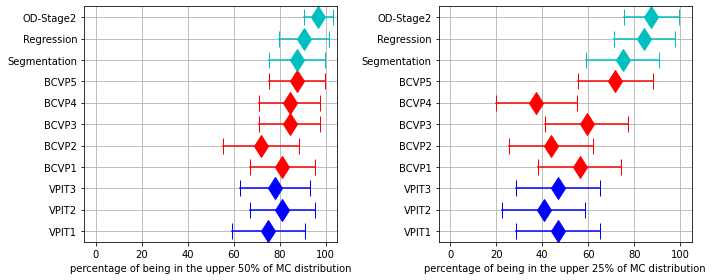

In [ ]:
import scipy.stats 
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return 100*m, 100*(m-h), 100*(m+h)


fig, axs = plt.subplots(1,2, figsize=(10,4))

ax=axs[0]

for rater in np.arange(1,4):
    m,ci5,ci95 = mean_confidence_interval((data.MC>data['medium'])[data.Rater==rater].to_numpy())
    ax.plot([ci5,ci95],[rater]*2,'b')
    ax.plot([ci5],[rater],'|b',markersize=16)
    ax.plot([ci95],[rater],'|b',markersize=16)
    ax.plot([m],[rater],'db',markersize=16)    

for rater in np.arange(4,9):
    m,ci5,ci95 = mean_confidence_interval((data.MC>data['medium'])[data.Rater==rater].to_numpy())
    ax.plot([ci5,ci95],[rater]*2,'r')
    ax.plot([ci5],[rater],'|r',markersize=16)
    ax.plot([ci95],[rater],'|r',markersize=16)
    ax.plot([m],[rater],'dr',markersize=16)    

for rater in np.arange(1,4):
    m,ci5,ci95 = mean_confidence_interval((dataAlgos.MC>dataAlgos['medium'])[dataAlgos.Rater==rater].to_numpy())
    ax.plot([ci5,ci95],[rater+8]*2,'c')
    ax.plot([ci5],[rater+8],'|c',markersize=16)
    ax.plot([ci95],[rater+8],'|c',markersize=16)
    ax.plot([m],[rater+8],'dc',markersize=16)
    
ax.set_xlabel('percentage of being in the upper 50% of MC distribution')
ax.set_yticks(np.arange(1,12))
ax.set_yticklabels(['VPIT%d'%k for k in np.arange(1,4)]+['BCVP%d'%k for k in np.arange(1,6)]+['Segmentation','Regression','OD-Stage2'])
ax.set_xlim([-5,105])

ax.grid()


ax=axs[1]

for rater in np.arange(1,4):
    m,ci5,ci95 = mean_confidence_interval((data.MC>data['75pct quartile'])[data.Rater==rater].to_numpy())
    ax.plot([ci5,ci95],[rater]*2,'b')
    ax.plot([ci5],[rater],'|b',markersize=16)
    ax.plot([ci95],[rater],'|b',markersize=16)
    ax.plot([m],[rater],'db',markersize=16)    

for rater in np.arange(4,9):
    m,ci5,ci95 = mean_confidence_interval((data.MC>data['75pct quartile'])[data.Rater==rater].to_numpy())
    ax.plot([ci5,ci95],[rater]*2,'r')
    ax.plot([ci5],[rater],'|r',markersize=16)
    ax.plot([ci95],[rater],'|r',markersize=16)
    ax.plot([m],[rater],'dr',markersize=16)    
    
for rater in np.arange(1,4):
    m,ci5,ci95 = mean_confidence_interval((dataAlgos.MC>dataAlgos['75pct quartile'])[dataAlgos.Rater==rater].to_numpy())
    ax.plot([ci5,ci95],[rater+8]*2,'c')
    ax.plot([ci5],[rater+8],'|c',markersize=16)
    ax.plot([ci95],[rater+8],'|c',markersize=16)
    ax.plot([m],[rater+8],'dc',markersize=16)
    
ax.set_xlabel('percentage of being in the upper 25% of MC distribution')
ax.set_yticks(np.arange(1,12))
ax.set_yticklabels(['VPIT%d'%k for k in np.arange(1,4)]+['BCVP%d'%k for k in np.arange(1,6)]+['Segmentation','Regression','OD-Stage2'])
ax.set_xlim([-5,105])
ax.grid()


plt.tight_layout()
plt.savefig('Figure7.pdf')